In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats
import numpy as np
%matplotlib inline

 ## 1. 수명주기

In [4]:
df_끝 = pd.read_csv('./datasets/insight_data/끝+지배구조.csv',index_col=0)
df_연속안정 = pd.read_csv('./datasets/insight_data/증증감+지배구조.csv',index_col=0)


In [5]:
# 한글
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = "Malgun Gothic"

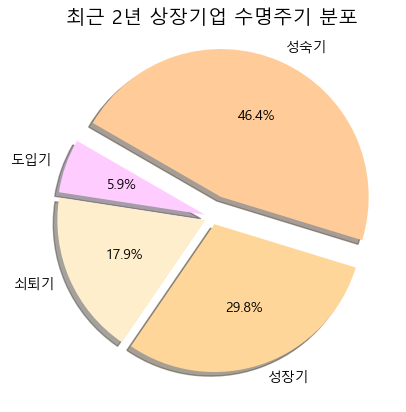

In [7]:
## 최종파일 최근 2년 기업의 수명주기 
from collections import Counter

data = df_끝[df_끝['회계년도'].isin([2020, 2021])]
data = data['수명주기']

# 데이터 개수 세기
count = Counter(data)
labels = list(count.keys())
count = list(count.values())

# 데이터 개수에 따라 정렬하기
sorted_index = sorted(range(len(count)), key=lambda k: count[k], reverse=True)
labels = [labels[i] for i in sorted_index]
count = [count[i] for i in sorted_index]

# 그래프 그리기
colors = ['#ffcc99', '#ffd699', '#ffeecc', '#ffccff']
explode = [0.05] * len(labels)
idx = count.index(max(count))
explode[idx] = 0.15

plt.pie(count, labels=labels, colors=colors, explode=explode, autopct='%.1f%%', startangle=150-idx*90, counterclock=False,  shadow=True,)
plt.title('최근 2년 상장기업 수명주기 분포', fontsize=14)
plt.show()

In [8]:
# predit 값이 1인것 (target이 1인지 여부 고려하지 아니함!)
df_pred = df_끝[df_끝['predict'] == 1]

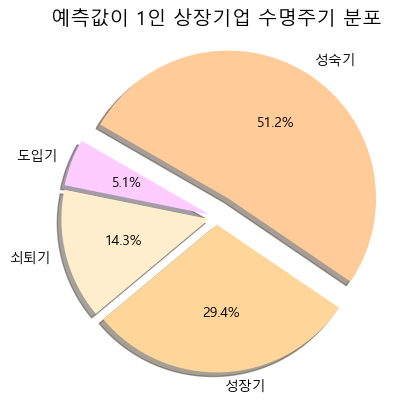

In [9]:
data = df_pred['수명주기']

# 데이터 개수 세기
count = Counter(data)
labels = list(count.keys())
count = list(count.values())

# 데이터 개수에 따라 정렬하기
sorted_index = sorted(range(len(count)), key=lambda k: count[k], reverse=True)
labels = [labels[i] for i in sorted_index]
count = [count[i] for i in sorted_index]

# 그래프 그리기
colors = ['#ffcc99', '#ffd699', '#ffeecc', '#ffccff']
explode = [0.05] * len(labels)
idx = count.index(max(count))
explode[idx] = 0.15

plt.pie(count, labels=labels, colors=colors, explode=explode, autopct='%.1f%%', startangle=150-idx*90, counterclock=False,  shadow=True,)
plt.title('예측값이 1인 상장기업 수명주기 분포', fontsize=14)
plt.show()

In [13]:
df_연속안정['수명주기'].value_counts()

성숙기    47
성장기    21
도입기     6
쇠퇴기     1
Name: 수명주기, dtype: int64

In [14]:
df_연속안정['수명주기'].describe()

count      75
unique      4
top       성숙기
freq       47
Name: 수명주기, dtype: object

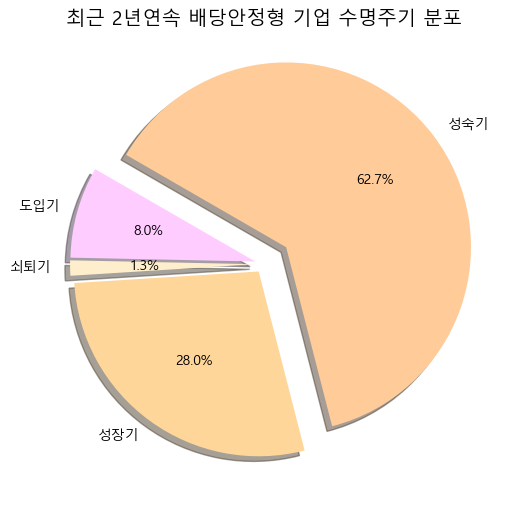

In [15]:
## predict 1, target 1 2년 연속으로 만족시킨 것
ratio = [(47/75),(21/75),(1/75),(6/75)]
labels = ['성숙기', '성장기', '쇠퇴기', '도입기']
explode = [0.05, 0.05, 0.05, 0.05]
colors = ['#ffcc99', '#ffd699', '#ffeecc', '#ffccff']
idx = np.argmax(ratio)
explode[idx] = 0.15


plt.figure(figsize=(6, 6))
plt.title('최근 2년연속 배당안정형 기업 수명주기 분포', fontsize=14)
plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=150-idx*90, counterclock=False, 
        explode=explode, shadow=True, colors=colors)
plt.show()

## 2.지배구조

In [10]:
df_지배 = pd.read_csv('./datasets/insight_data/끝+지배구조.csv',index_col=0)

In [11]:
# 파일에 - 라고 있는 것을 공백으로 변경
df_지배['지배구조']=df_지배['지배구조'].replace("-","")

In [12]:
df_지배 = df_지배.dropna(subset=['지배구조'])

In [13]:
df_지배['지배구조'].describe()

count     642
unique      7
top        B+
freq      238
Name: 지배구조, dtype: object

In [14]:
df_지배['지배구조'].value_counts()

B+    238
B     202
A     109
C      66
       12
A+      8
D       7
Name: 지배구조, dtype: int64

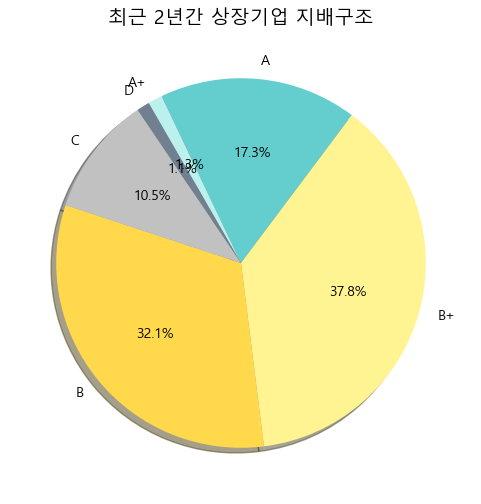

In [15]:
## 지배구조관련값들은 2020년,2021년 데이터만 존재함으로 자동으로 2년치 기업만 남아있음
# 최근 2년간 상장기업 지배구조
ratio = [(8),(109),(238),(202),(66),(7)]
labels = ['A+', 'A', 'B+', 'B','C','D']
explode = [0.05, 0.05, 0.05, 0.05, 0.05]
colors = ['#BBF0ED','#64CECE','#FFF491', '#FFD84B', '#C2C1C1','#708090']
idx = np.argmax(ratio)
explode[idx] = 0.15

plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = "Malgun Gothic"

plt.figure(figsize=(6, 6))
plt.title('최근 2년간 상장기업 지배구조', fontsize=14)
plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=150-idx*15, counterclock=False, 
         shadow=True, colors=colors)
plt.show()

In [16]:
# predict이 1인것만
df_지배pred = df_지배[df_지배['predict'] == 1]

In [17]:
df_지배pred['지배구조'].value_counts()

B+    120
B      85
A      61
C      25
        5
A+      5
D       3
Name: 지배구조, dtype: int64

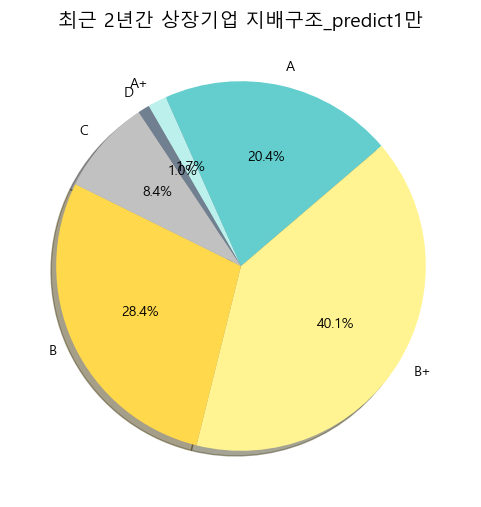

In [18]:
#최근 2년간 상장기업 지배구조_predict1만
ratio = [(5),(61),(120),(85),(25),(3)]
labels = ['A+', 'A', 'B+', 'B','C','D']
explode = [0.05, 0.05, 0.05, 0.05, 0.05]
colors = ['#BBF0ED','#64CECE','#FFF491', '#FFD84B', '#C2C1C1','#708090']
idx = np.argmax(ratio)
explode[idx] = 0.15

plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = "Malgun Gothic"

plt.figure(figsize=(6, 6))
plt.title('최근 2년간 상장기업 지배구조_predict1만', fontsize=14)
plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=150-idx*15, counterclock=False, 
         shadow=True, colors=colors)
plt.show()

In [20]:
df = pd.read_csv('./datasets/insight_data/증증감+지배구조.csv',index_col=0)
df['지배구조']=df['지배구조'].replace("-","")
df = df.dropna(subset=['지배구조'])
df['지배구조'].describe()

count     32
unique     4
top       B+
freq      15
Name: 지배구조, dtype: object

In [22]:
df['지배구조'].value_counts()

B+    15
A     10
B      6
A+     1
Name: 지배구조, dtype: int64

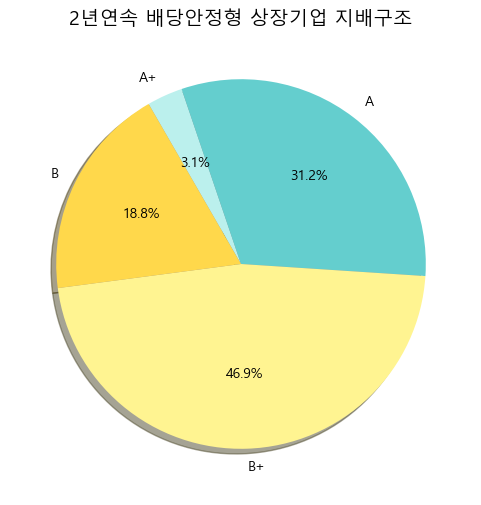

In [23]:
# 2년연속 target, predict 모두 1인 배당안정형 지배구조
ratio = [(1),(10),(15),(6)]
labels = ['A+', 'A', 'B+', 'B']
explode = [0.05, 0.05, 0.05, 0.05]
colors = ['#BBF0ED','#64CECE','#FFF491', '#FFD84B']
idx = np.argmax(ratio)
explode[idx] = 0.15

plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = "Malgun Gothic"

plt.figure(figsize=(6, 6))
plt.title('2년연속 배당안정형 상장기업 지배구조', fontsize=14)
plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=150-idx*15, counterclock=False, 
         shadow=True, colors=colors)
plt.show()

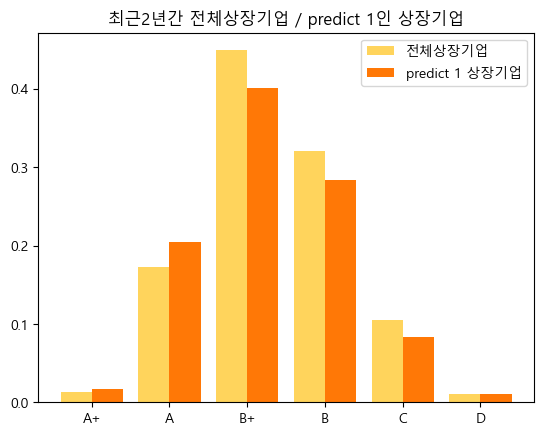

In [36]:
# 최근2년간 모든 상장기업과 predict 1인 값의 지배구조 점수비율 차이 비교
from matplotlib import pyplot as plt

topics = ['A+', 'A', 'B+', 'B', 'C', 'D']
value_a = [(8/630),(109/630),(283/630),(202/630),(66/630),(7/630)]
value_b = [(5/299),(61/299),(120/299),(85/299),(25/299),(3/299)]

def create_x(t, w, n, d):
    return [t*x + w*n for x in range(d)]

value_a_x = create_x(2, 0.8, 1, 6)
value_b_x = create_x(2, 0.8, 2, 6)

ax = plt.subplot()

# Change the color of the bars
ax.bar(value_a_x, value_a, color='#ffd45c', label='전체상장기업')
ax.bar(value_b_x, value_b, color='#ff7806', label='predict 1 상장기업')

middle_x = [(a+b)/2 for (a,b) in zip(value_a_x, value_b_x)]
ax.set_xticks(middle_x)
ax.set_xticklabels(topics)
ax.set_title('최근2년간 전체상장기업 / predict 1인 상장기업')
ax.legend()

plt.show()

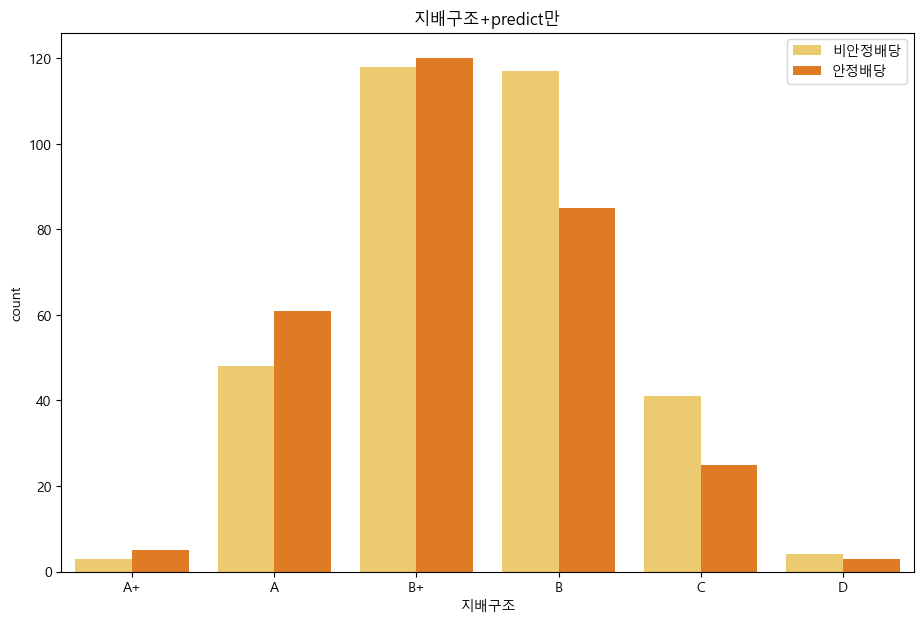

In [27]:
# predict값이 0 (비안정배당), 1(안정배당) 한 값들의 지배구조 점수비율비교
plt.figure(figsize=(11,7))
plt.title('지배구조+predict만')
order = ['A+', 'A', 'B+', 'B','C','D']

color_dict = {0: '#ffd45c', 1: '#ff7806'}

ax = sns.countplot(x='지배구조', hue='predict', data=df_지배, palette=color_dict, order=order)

#ax = sns.countplot(x='지배구조', hue='predict', data=df1, palette='YlOrBr',order=order)
plt.legend(['비안정배당', '안정배당'])

total = len(df_지배['지배구조'])
for p in ax.patches:
    percentage = ""
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height() + 0.5
    ax.annotate(percentage, (x, y))

## 3. 산업성장 비교

In [38]:
df_끝 = pd.read_csv("./datasets/insight_data/끝+지배구조.csv", index_col=0)

C:\Users\신민경\AppData\Local\Temp\ipykernel_98300\2481607327.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_filtered= df_끝[df_끝["산업분류"] != "부동산업"].groupby("산업분류").mean()[["산업평균_총자산증가율차분"]].sort_values(by="산업평균_총자산증가율차분",ascending=True)


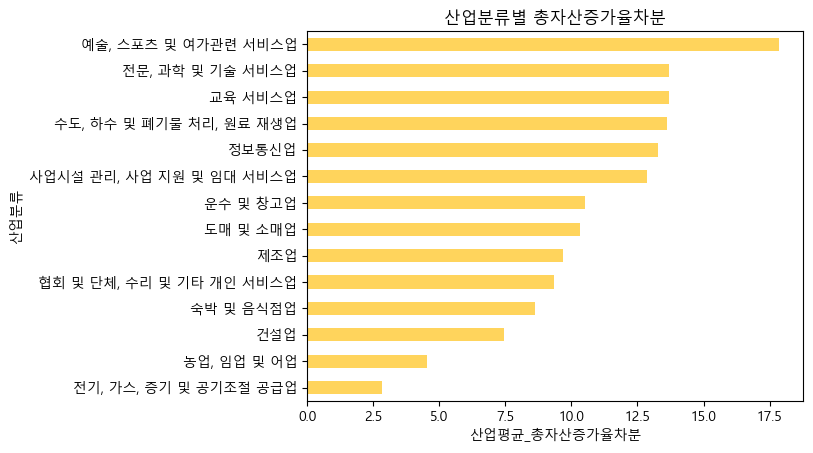

In [39]:
# 산업분류별 총자산 증가율 차분 바차트 시각화
# 데이터프레임 생성
df_filtered= df_끝[df_끝["산업분류"] != "부동산업"].groupby("산업분류").mean()[["산업평균_총자산증가율차분"]].sort_values(by="산업평균_총자산증가율차분",ascending=True)
# 바차트 그리기
df_filtered.plot(kind='barh', legend=None, color = "#ffd45c")

# 축 라벨링
plt.xlabel('산업평균_총자산증가율차분')
plt.ylabel('산업분류')

# 타이틀 설정
plt.title('산업분류별 총자산증가율차분')

# 그래프 보이기
plt.show()

In [40]:
col_필요산업=['정보통신업', '전문, 과학 및 기술 서비스업', "도매 및 소매업" ,'건설업', '운수 및 창고업','사업시설 관리, 사업 지원 및 임대 서비스업', "제조업"]

C:\Users\신민경\AppData\Local\Temp\ipykernel_98300\2933288932.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_filtered= df_끝[df_끝["산업분류"] .isin(col_필요산업)].groupby("산업분류").mean()[["산업평균_총자산증가율차분"]].sort_values(by="산업평균_총자산증가율차분",ascending=True)


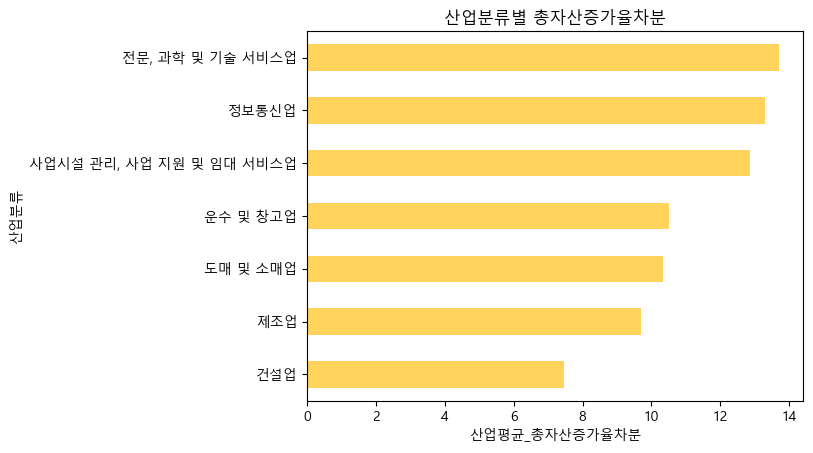

In [41]:
#  특정 산업만 바차트 시각화
#  데이터프레임 생성
df_filtered= df_끝[df_끝["산업분류"] .isin(col_필요산업)].groupby("산업분류").mean()[["산업평균_총자산증가율차분"]].sort_values(by="산업평균_총자산증가율차분",ascending=True)
# 바차트 그리기
df_filtered.plot(kind='barh', legend=None, color = "#ffd45c")

# 축 라벨링
plt.xlabel('산업평균_총자산증가율차분')
plt.ylabel('산업분류')

# 타이틀 설정
plt.title('산업분류별 총자산증가율차분')

# 그래프 보이기
plt.show()

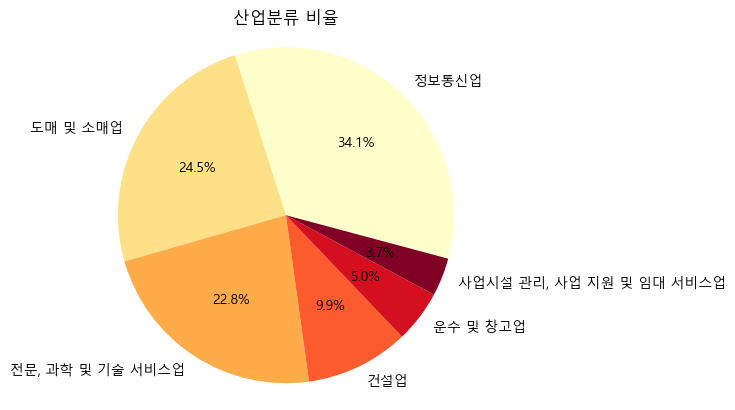

In [42]:
# df_끝 산업분류가 제조업이 아닌 산업들의 비율   
# 데이터프레임에서 값 추출
values=df_끝[df_끝["산업분류"] != "제조업"]["산업분류"].value_counts(normalize=True)[:6]

# 색상 팔레트
colors = plt.cm.YlOrRd(np.linspace(0, 1, len(values)))

# 파이차트 그리기
fig, ax = plt.subplots()
ax.pie(values, labels=values.index, colors=colors, autopct='%1.1f%%', startangle=-15)

# 원형을 유지
ax.axis('equal')

# 차트 타이틀 추가
plt.title("산업분류 비율")

# 차트 보여주기
plt.show()

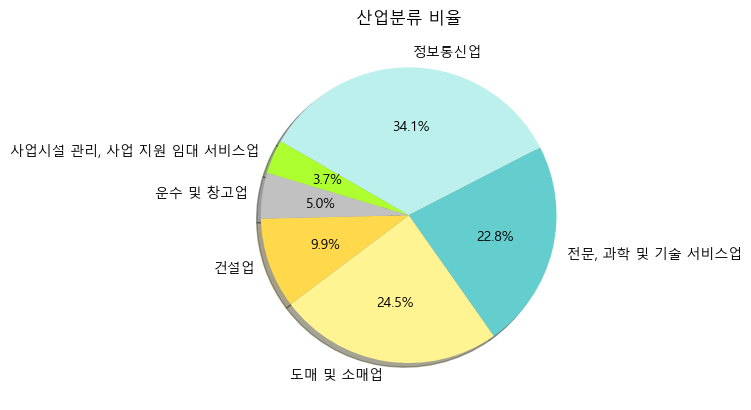

In [37]:
# 원위치 조절하기
# df_끝 산업분류가 제조업이 아닌 산업들의 비율   


ratio = [(34.1),(22.8),(24.5),(9.9),(5.0), (3.7)]

labels = ['정보통신업', '전문, 과학 및 기술 서비스업', "도매 및 소매업" ,'건설업', '운수 및 창고업','사업시설 관리, 사업 지원 임대 서비스업']
colors = ['#BBF0ED','#64CECE','#FFF491', '#FFD84B', '#C2C1C1', '#ADFF2F']
idx = np.argmax(ratio)






plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=150-idx*15, counterclock=False,   shadow=True, colors=colors)

plt.title('산업분류 비율')
plt.show()

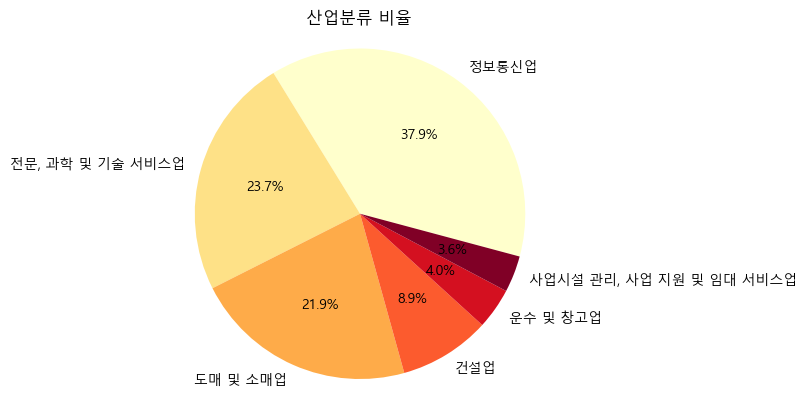

In [38]:
#  df_끝 predict 가 1이고 산업분류가 제조업이 아닌 산업들의 비율  
# 데이터프레임에서 값 추출
values=df_끝[ (df_끝["predict"] == 1) & (df_끝["산업분류"] != "제조업")]["산업분류"].value_counts(normalize=True)[:6]

# 색상 팔레트
colors = plt.cm.YlOrRd(np.linspace(0, 1, len(values)))

# 파이차트 그리기
fig, ax = plt.subplots()
ax.pie(values, labels=values.index, colors=colors, autopct='%1.1f%%', startangle=-15)

# 원형을 유지
ax.axis('equal')

# 차트 타이틀 추가
plt.title("산업분류 비율")

# 차트 보여주기
plt.show()

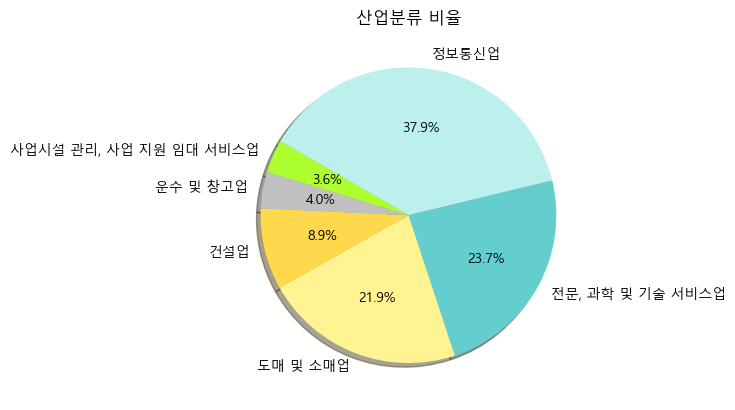

In [39]:
#  df_끝 predict 가 1이고 산업분류가 제조업이 아닌 산업들의 비율   
# 원위치 조절

ratio = [(37.9),(23.7),(21.9),(8.9),(4.0), (3.6)]

labels = ['정보통신업', '전문, 과학 및 기술 서비스업', "도매 및 소매업" ,'건설업', '운수 및 창고업','사업시설 관리, 사업 지원 임대 서비스업']
colors = ['#BBF0ED','#64CECE','#FFF491', '#FFD84B', '#C2C1C1', '#ADFF2F']
idx = np.argmax(ratio)






plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=150-idx*15, counterclock=False,   shadow=True, colors=colors)

plt.title('산업분류 비율')
plt.show()

In [40]:
df_증증감 = pd.read_csv("./datasets/증증감+지배구조.csv", index_col=0)
df_증증감.drop("index", axis= 1, inplace=True) 

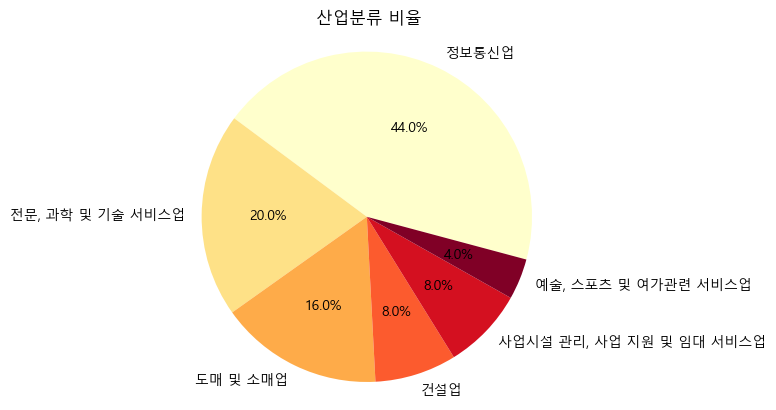

In [41]:
#  df_끝 predict 가 1이고 산업분류가 제조업이 아닌 산업들의 비율  
# 데이터프레임에서 값 추출
values=df_증증감[(df_증증감["산업분류"] != "제조업")]["산업분류"].value_counts(normalize=True)[:6]

# 색상 팔레트
colors = plt.cm.YlOrRd(np.linspace(0, 1, len(values)))

# 파이차트 그리기
fig, ax = plt.subplots()
ax.pie(values, labels=values.index, colors=colors, autopct='%1.1f%%', startangle=-15)

# 원형을 유지
ax.axis('equal')

# 차트 타이틀 추가
plt.title("산업분류 비율")

# 차트 보여주기
plt.show()

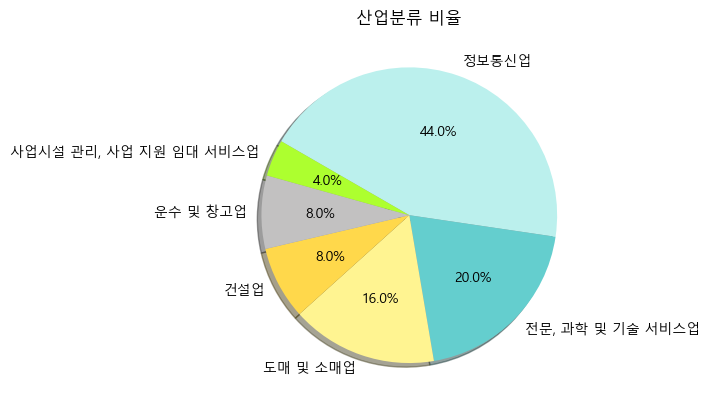

In [42]:
# 원위치 조절
#  df_증증감  산업분류가 제조업이 아닌 산업들의 비율   


ratio = [(44.0),(20.0),(16.0),(8.0),(8.0), (4.0)]

labels = ['정보통신업', '전문, 과학 및 기술 서비스업', "도매 및 소매업" ,'건설업', '운수 및 창고업','사업시설 관리, 사업 지원 임대 서비스업']
colors = ['#BBF0ED','#64CECE','#FFF491', '#FFD84B', '#C2C1C1', '#ADFF2F']
idx = np.argmax(ratio)






plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=150-idx*15, counterclock=False,   shadow=True, colors=colors)

plt.title('산업분류 비율')
plt.show()